In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

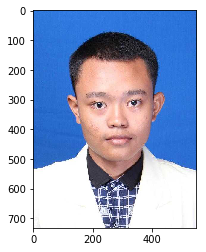

In [3]:
imgtest = mpimg.imread('C:/Users\Guerzoniansus\Documents\Project\Machine Learning\my-machine-learning\Modul05\komang.jpg')
imgplot = plt.imshow(imgtest)
plt.show()

In [4]:
print("ukuran gambar : ", imgtest.shape)

ukuran gambar :  (732, 549, 3)


In [5]:
data = imgtest / 255.0
data = data.reshape(549 * 732, 3)
data.shape

(401868, 3)

In [17]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T
        
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        
        fig.suptitle(title, size=20)
        plt.show()

In [18]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [9]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")


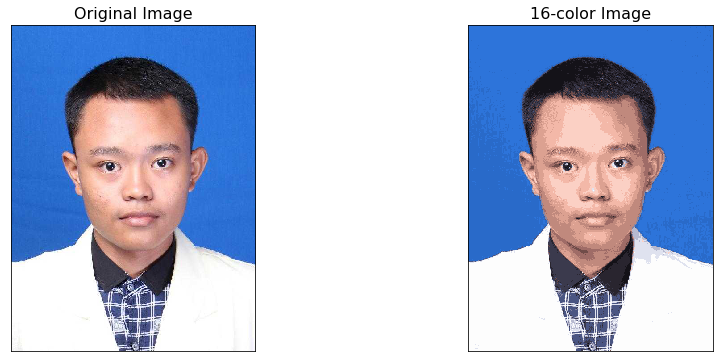

In [16]:
imgtest_recolored = new_colors.reshape(imgtest.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(imgtest)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(imgtest_recolored)
ax[1].set_title('16-color Image', size=16)
plt.show()